# eypsurv
This notes demonstrates the basic usage of `epysurv`

In [2]:
import sys
sys.path.append("..")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from epysurv import data as epidata

In [4]:
plt.rc("figure", figsize=(16, 8))

Let's first get some data and plot it. We use the case counts of Salmonella Newport from Germany between 2004 and 2013. The data is already split into training and test set. We see that there are no outbreaks in the training set, but some around the end of 2011 in the test set.

In [5]:
train, test = epidata.salmonella()
train.head()

,n_cases,n_outbreak_cases,outbreak
2004-01-05,0,0,False
2004-01-12,0,0,False
2004-01-19,2,0,False
2004-01-26,2,0,False
2004-02-02,1,0,False


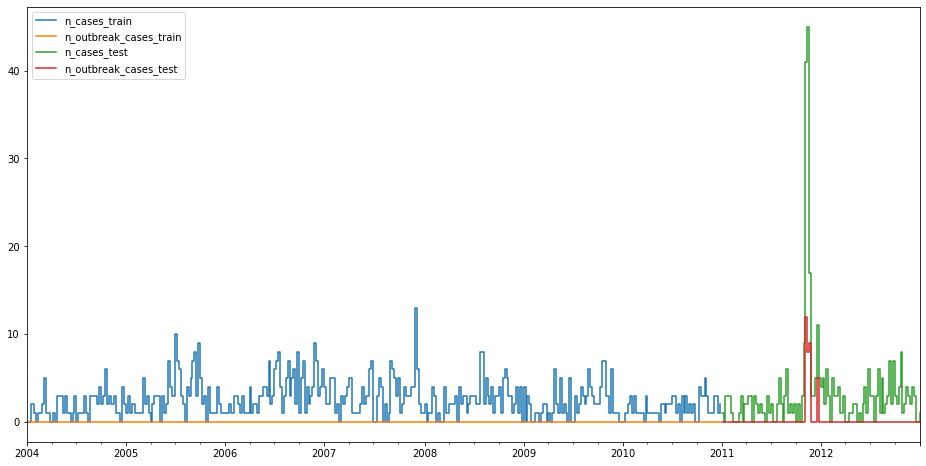

In [6]:
fig, ax = plt.subplots()
train.add_suffix("_train").plot(drawstyle="steps-post", ax=ax)
test.add_suffix("_test").plot(drawstyle="steps-post", ax=ax)

Next we import some classical models: `EarsC1` and `FarringtonFlexible`. The API works really similiar to `scikit-learn`. Finally, we plot the predictions.

In [9]:
from epysurv.models.timepoint import EarsC1, FarringtonFlexible
from epysurv.visualization.model_diagnostics import plot_prediction, plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [10]:
model = EarsC1()
model.fit(train)
pred = model.predict(test)
pred.head()

input 


,n_cases,n_outbreak_cases,outbreak,alarm
2011-01-03,1,0,False,False
2011-01-10,0,0,False,False
2011-01-17,3,0,False,False
2011-01-24,3,0,False,False
2011-01-31,3,0,False,False


In [13]:
pred.query("alarm != 0")

,n_cases,n_outbreak_cases,outbreak,alarm
2011-08-01,5,0,False,True
2011-10-31,9,0,False,True
2011-11-07,41,12,True,True
2012-06-11,4,0,False,True
2012-06-25,6,0,False,True


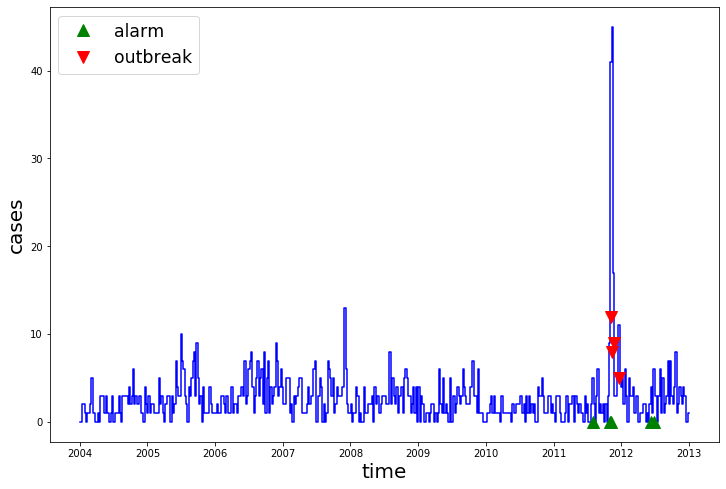

In [12]:
plot_prediction(train, test, pred)

input 


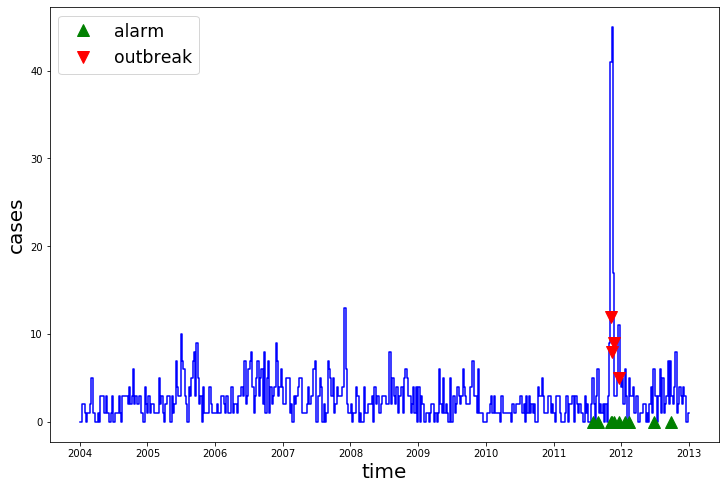

In [14]:
model = FarringtonFlexible()
model.fit(train)
pred = model.predict(test)
plot_prediction(train, test, pred)

By looking at the confusion matrix, we can see the the `FarringtonFlexible` successfully detected all outbreak, but also produced some false positives.

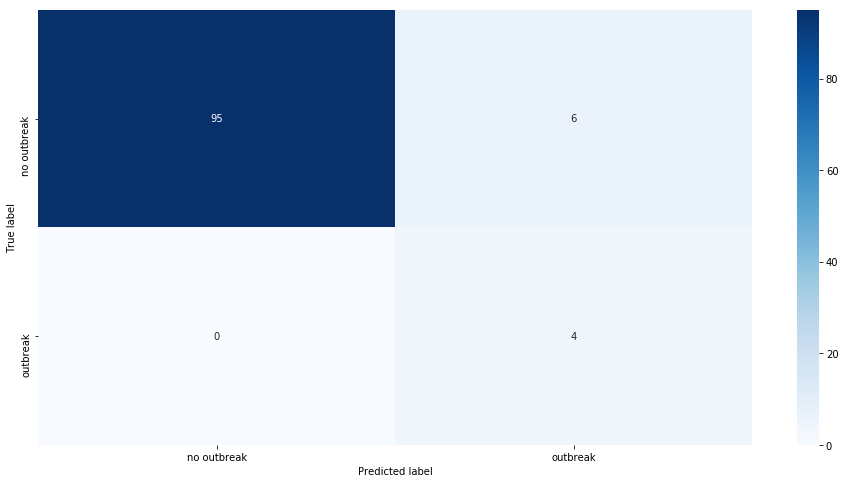

In [9]:
plot_confusion_matrix(confusion_matrix(test["outbreak"], pred["alarm"]), class_names=["no outbreak", "outbreak"]);